### Name: Aaran D'Lima


### Reg. No.: 21BDA23

# SEARCH ENGINE OPTIMIZATION

 <img src="https://i.imgur.com/JwDSQEY.png" alt = "seo">
 

# Table of contents

[<h3>1. What is search engine Optimization?</h3>](#1)

[<h3>2. Recipe Keywords In Google</h3>](#2)

[<h3>3. SEO for Flights and Ticket Keywords followed by Analysis</h3>](#3)

[<h3>4. Comparison with flights and ticket keywords with Google Recipe</h3>](#4)

[<h3>5. Recipe Keywords on YouTube</h3>](#5)



### What is search engine optimization?<a class="anchor" id="1"></a>

It is a process of enhancing the online visibility of one’s business using optimization techniques based on keyword research, link building, and content production. It is all about improving the online presence of businesses by targeting traffic to web pages through effective search engine techniques. In this way, you see your website and keywords appearing on top of the search engine result pages known as SERPs.

It targets organic traffic and works gradually to catch the interest of the audience to your search engine results. 

#### In this project we can see the analysis on keywords used in google and youtube as well as flight keywords. Gradually I am comparing both of the keywords to see how different they are.

##### Firstly let us do some analysis on Recipes keywords used in google snd Youtube
I have used pandas for data manipulation, plotly for data visualization, and advertools, for importing search data (and having it in a DataFrame, analyzing the text (titles, descriptions, etc.), and how it relates to numbers (views, likes, subscribers, etc.)

###### Before getting into importing packages it is must to know version of the packages and packages used

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

import advertools as adv
print('Package        Version')
print('='*25)
for p in [adv, pd, plotly]:
    print(f"{p.__name__:<15}", ': ', p.__version__, sep='')

Package        Version
advertools     : 0.13.1
pandas         : 1.2.4
plotly         : 5.9.0


# 2.Recipe Keywords In Google<a class="anchor" id="2"></a>

In [2]:
dishes = pd.read_csv('C:/Users/Aaron/Desktop/RECIPEES/Dish_list.csv')
dishes.head()

,dish
0,Kabuli Palaw
1,Tavë kosi
2,Couscous
3,Escudella
4,Muamba de galinha


In [3]:
dishes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dish    242 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [4]:
dishes.describe()

2022-08-06 16:16:48,397 | INFO | utils.py:157 | _init_num_threads | NumExpr defaulting to 8 threads.


,dish
count,242
unique,214
top,Ugali
freq,3


Inorder to generate the queries, I have added "recipe" and "how to make" to each dish.  
As a result each dish will be searched twice, once as "**dish** recipe" and once as "how to make 
**dish**".
    

In [5]:
queries_recipe = [x + ' recipe' for x in dishes['dish'].tolist()]
queries_how_to_make = ['how to make ' + x for x in dishes['dish'].tolist()]
queries = queries_recipe + queries_how_to_make
queries[:10] + queries[-10:]

['Kabuli Palaw recipe',
 'Tavë kosi recipe',
 'Couscous recipe',
 'Escudella recipe',
 'Muamba de galinha recipe',
 'Pepperpot recipe',
 'Asado recipe',
 'Khash recipe',
 'Keshi yena recipe',
 'Vegemite recipe',
 'how to make Asado',
 "how to make O'sh",
 'how to make Lap lap',
 'how to make Fettuccine alla Papalina',
 'how to make Pabellón criollo',
 'how to make Phở',
 'how to make Kabsa',
 'how to make Nshima',
 'how to make Sadza',
 'how to make doi']

###### Inorder to be more accurate firstly I have taken Google data. Let us see the volume of data.


In [6]:
recipes = pd.read_csv('C:/Users/Aaron/Desktop/RECIPEES/recipes_serp_data.csv')
print('shape:', recipes.shape)

shape: (4860, 27)


In [7]:
recipes.describe()

,rank,totalResults,count,formattedSearchTime,searchTime,startIndex
count,4860.000000,4.860000e+03,4860.0,4860.000000,4860.000000,4860.0
mean,5.500000,2.742318e+07,10.0,0.249815,0.249881,1.0
std,2.872577,9.761501e+07,0.0,0.072345,0.072337,0.0
min,1.000000,8.900000e+01,10.0,0.110000,0.107850,1.0
25%,3.000000,6.240000e+04,10.0,0.210000,0.213564,1.0
50%,5.500000,4.360000e+05,10.0,0.240000,0.239872,1.0
75%,8.000000,7.080000e+06,10.0,0.280000,0.279044,1.0
max,10.000000,1.090000e+09,10.0,0.630000,0.630271,1.0


In [8]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   searchTerms            4860 non-null   object 
 1   rank                   4860 non-null   int64  
 2   title                  4860 non-null   object 
 3   snippet                4859 non-null   object 
 4   displayLink            4860 non-null   object 
 5   link                   4860 non-null   object 
 6   queryTime              4860 non-null   object 
 7   totalResults           4860 non-null   int64  
 8   cacheId                4602 non-null   object 
 9   count                  4860 non-null   int64  
 10  cseName                4860 non-null   object 
 11  cx                     4860 non-null   object 
 12  fileFormat             13 non-null     object 
 13  formattedSearchTime    4860 non-null   float64
 14  formattedTotalResults  4860 non-null   object 
 15  form

#### There are 27 columns but for my analysis I have made use of first 8 columns. 

In [9]:
recipes.sample(5).iloc[:, :8]

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults
2459,how to make Tavë kosi,10,"Tavë Kosi and Qofte Të Fërguara, Albania's Nat...","Sep 16, 2015 ... And you even get two dishes f...",foodperestroika.com,https://foodperestroika.com/2015/09/16/tave-ko...,2019-03-30 01:15:38.836167+00:00,20000
957,Kimchi recipe,8,Traditional kimchi recipe (Tongbaechu-kimchi: ...,"Jun 22, 2014 ... This is the classic, spicy, t...",www.youtube.com,https://www.youtube.com/watch?v=eTucCw1w6Ak,2019-03-30 01:15:36.449953+00:00,17600000
2685,how to make Seswaa,6,Easy Seswaa Recipe - My Burnt Orange,Here's a quick and easy recipie for how to mak...,www.myburntorange.com,https://www.myburntorange.com/how-to-make-seswaa/,2019-03-30 01:15:39.214041+00:00,4400
1911,Cocido madrileño recipe,2,Cocido Madrileño Recipe,Cocido Madrileño - or simply cocido - is proba...,www.spain-recipes.com,https://www.spain-recipes.com/cocido-recipe.html,2019-03-30 01:15:37.971865+00:00,1190000
2182,Skeddan jiarg recipe,3,Cutting the Turf in a car park - Skeddan Jiarg...,"Nov 9, 2017 ... A simplified version of the Ma...",vimeo.com,https://vimeo.com/242038836,2019-03-30 01:15:38.398221+00:00,115


All column names are clear to us.

`QueryTime` refers to when this query was requested from Google. This becomes very important if you plan on running the same queries periodically, to show how rankings are changing in time.



Now let us create a quick summary of all the domains that appeared, and some summary statistics:

`count`: The number of times the domain appeared in the dataset.THe domain appear more than once in the same query.

`avg_rank`: The average rank that the domain appeared on, in the dataset. 

`coverage`: The number of times the domain appeared ÷ the number of unique queries sent.


In [10]:
summary = (recipes
           .groupby(['displayLink'], as_index=False)
           .agg({'rank': ['count', 'mean']})
           .sort_values(('rank', 'count'), ascending=False)
           .assign(coverage=lambda df: df[('rank', 'count')].div(recipes['searchTerms'].nunique())))
summary.columns = ['displayLink', 'count', 'avg_rank', 'coverage']
summary['displayLink'] = summary['displayLink'].str.replace('www.', '')
summary['avg_rank'] = summary['avg_rank'].round(1)
summary['coverage'] = summary['coverage'].mul(100).round(1).astype(str).add('%')
summary.head(20).reset_index(drop=True)

<ipython-input-10-38b013deaf7f>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



,displayLink,count,avg_rank,coverage
0,youtube.com,662,4.8,154.0%
1,allrecipes.com,177,4.4,41.2%
2,en.wikipedia.org,139,5.7,32.3%
3,foodnetwork.com,120,5.2,27.9%
4,thespruceeats.com,103,4.0,24.0%
5,pinterest.com,101,7.5,23.5%
6,geniuskitchen.com,98,4.8,22.8%
7,africanbites.com,63,4.4,14.7%
8,cooking.nytimes.com,62,5.2,14.4%
9,epicurious.com,59,5.4,13.7%


YouTube is clearly the undisputed leader, and very far from the first competitor. 
Let's visualize this summary for a different view. Before that, we create a summary showing how many times each domain appeared on every rank.  

For example, in the sample below, cooking.nytimes.com appeared on rank one, eight times, on rank two, five times, and so on. Before that I created `top_domains` which are the top ten domains that appeared the most. You can change this of course if you want more, or fewer domains.

#### We can see that Youtube leads the competetion and it is a well known fact to all of us.

Let's visualize this summary for a different view. Before that, we create a summary showing how many times each domain appeared on every rank.  

In [11]:
top_domains = recipes['displayLink'].value_counts()[:10].index.tolist()
top_df = recipes[recipes['displayLink'].isin(top_domains)]

rank_counts = top_df.groupby(['displayLink', 'rank']).agg({'rank': ['count']}).reset_index()
rank_counts.columns = ['displayLink', 'rank', 'count']
rank_counts.head()

,displayLink,rank,count
0,cooking.nytimes.com,1,8
1,cooking.nytimes.com,2,5
2,cooking.nytimes.com,3,10
3,cooking.nytimes.com,4,4
4,cooking.nytimes.com,5,5


In [12]:
fig = go.FigureWidget()

fig.add_scatter(x=top_df['displayLink'].str.replace('www.', ''),
                y=top_df['rank'], mode='markers',
                marker={'size': 35, 'opacity': 0.035,})

fig.add_scatter(x=rank_counts['displayLink'].str.replace('www.', ''),
                y=rank_counts['rank'], mode='text', text=rank_counts['count'])

fig.layout.hovermode = False
fig.layout.yaxis.autorange = 'reversed'
fig.layout.yaxis.zeroline = False
fig.layout.yaxis.tickvals = list(range(1, 11))
fig.layout.height = 600
fig.layout.title = 'Top Domains for 430 Recipes Keywords - Google'
fig.layout.yaxis.title = 'SERP Rank (number of appearances)'
fig.layout.showlegend = False
fig.layout.paper_bgcolor = '#eeeeee'
fig.layout.plot_bgcolor = '#eeeeee'
iplot(fig)

<ipython-input-12-b3bdc3a6bd8f>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-12-b3bdc3a6bd8f>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



For every appearance on a search result, an almost transparent circle is plotted on that position for the domain. The more times it appears, the more opaque the circle gets. As you can expect, YouTube's results clearly stand out from the rest.  
The numbers on the circles show the exact number of times that each domain appeared on that position (rank). 

YouTube appears mostly on ranks three to five, as shown above, in the summary table where they have an average rank of 4.8.


# 3.SEO for Flights and Ticket Keywords followed by Analysis <a class="anchor" id="3"></a>

##### It is more important to get an idea how the above distribution compares to other industries. So I make use of similar dataset for flights and ticket keywords

Let us do some data cleaning and Exploratory data analysis for the same.

#### DATA EXPLORATION

In [13]:
df = pd.read_csv("C:/Users/Aaron/Desktop/Flights/flights_tickets_serp2018-12-16.csv")
df.head(3)

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,htmlFormattedUrl,htmlSnippet,htmlTitle,kind,pagemap,cseName,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
0,flights to hong kong,1,Cheap Flights to Hong Kong (HKG) from $397 - K...,"Find flights to Hong Kong on XiamenAir, Hong K...",www.kayak.com,https://www.kayak.com/flight-routes/United-Sta...,2018-12-16 11:26:30.485612+00:00,106000000,W42baDpas_gJ,https://www.kayak.com/flight-routes/United.../...,https://www.kayak.com/<b>flight</b>-routes/Uni...,"Find <b>flights to Hong Kong</b> on XiamenAir,...",Cheap <b>Flights to Hong Kong</b> (HKG) from $...,customsearch#result,"{'cse_thumbnail': [{'width': '310', 'height': ...",PySearch,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
1,flights to hong kong,2,"$480 Flights to Hong Kong, China (HKG) - TripA...",Cheap Flights to Hong Kong: Enter your dates o...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g294217-Ho...,2018-12-16 11:26:30.485612+00:00,106000000,5jsjhmxgxvkJ,https://www.tripadvisor.com/Flights-g294217-Ho...,https://www.tripadvisor.com/<b>Flights</b>-g29...,Cheap <b>Flights to Hong Kong</b>: Enter your ...,"$480 <b>Flights to Hong Kong</b>, China (HKG) ...",customsearch#result,"{'cse_thumbnail': [{'width': '300', 'height': ...",PySearch,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"
2,flights to hong kong,3,Cheap Flights to Hong Kong International from ...,Search cheap flights using Skyscanner's free f...,www.skyscanner.com,https://www.skyscanner.com/flights-to/hkg/chea...,2018-12-16 11:26:30.485612+00:00,106000000,EI78TI4Q1qYJ,https://www.skyscanner.com/flights-to/hkg/chea...,https://www.skyscanner.com/<b>flights-to/hk</b...,Search cheap <b>flights</b> using Skyscanner&#...,Cheap <b>Flights to Hong Kong</b> Internationa...,customsearch#result,{'metatags': [{'viewport': 'width=device-width...,PySearch,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.162895,0.16,"106,000,000"


In [14]:
df.describe()

,rank,totalResults,count,startIndex,searchTime,formattedSearchTime
count,4000.00000,4.000000e+03,4000.0,4000.0,4000.000000,4000.000000
mean,5.50000,5.538642e+07,10.0,1.0,0.321426,0.321350
std,2.87264,8.004667e+07,0.0,0.0,0.061791,0.062045
min,1.00000,9.940000e+04,10.0,1.0,0.162895,0.160000
25%,3.00000,9.217500e+06,10.0,1.0,0.278504,0.280000
50%,5.50000,2.300000e+07,10.0,1.0,0.314640,0.310000
75%,8.00000,7.097500e+07,10.0,1.0,0.354942,0.352500
max,10.00000,5.420000e+08,10.0,1.0,0.533649,0.530000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   searchTerms            4000 non-null   object 
 1   rank                   4000 non-null   int64  
 2   title                  4000 non-null   object 
 3   snippet                4000 non-null   object 
 4   displayLink            4000 non-null   object 
 5   link                   4000 non-null   object 
 6   queryTime              4000 non-null   object 
 7   totalResults           4000 non-null   int64  
 8   cacheId                3975 non-null   object 
 9   formattedUrl           4000 non-null   object 
 10  htmlFormattedUrl       4000 non-null   object 
 11  htmlSnippet            4000 non-null   object 
 12  htmlTitle              4000 non-null   object 
 13  kind                   4000 non-null   object 
 14  pagemap                3996 non-null   object 
 15  cseN

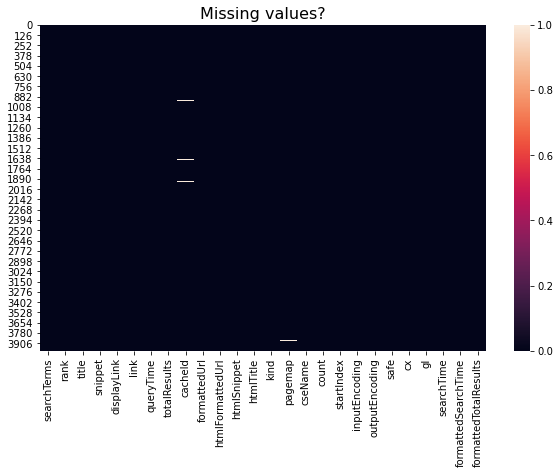

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Missing values?",fontsize = 16)
plt.show()

#### Let's have a more accurate look at the missing values


In [17]:
df.isnull().sum()

searchTerms               0
rank                      0
title                     0
snippet                   0
displayLink               0
link                      0
queryTime                 0
totalResults              0
cacheId                  25
formattedUrl              0
htmlFormattedUrl          0
htmlSnippet               0
htmlTitle                 0
kind                      0
pagemap                   4
cseName                   0
count                     0
startIndex                0
inputEncoding             0
outputEncoding            0
safe                      0
cx                        0
gl                        0
searchTime                0
formattedSearchTime       0
formattedTotalResults     0
dtype: int64

The missing values are only in the columns we won't use; therefore we will let them as they are.

In [18]:
s = df["searchTerms"].nunique()
r = df["rank"].nunique()
print(f"Number of search terms: {s}\nNumber of ranks: {r}\nNumber of entries: {df.shape[0]}")

Number of search terms: 200
Number of ranks: 10
Number of entries: 4000


##### HISTOGRAM  AND CORRELATION PLOT FOR ONLY ONE FILE OF THE FLIGHT DATASET

In [19]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [20]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [21]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv("C:/Users/Aaron/Desktop/Flights/flights_tickets_serp2018-12-16.csv")
df1.dataframeName = 'flights_tickets_serp2019-05-01.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 4000 rows and 26 columns


In [22]:
import numpy as np

<ipython-input-19-0121bf3d9d74>:10: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-19-0121bf3d9d74>:10: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



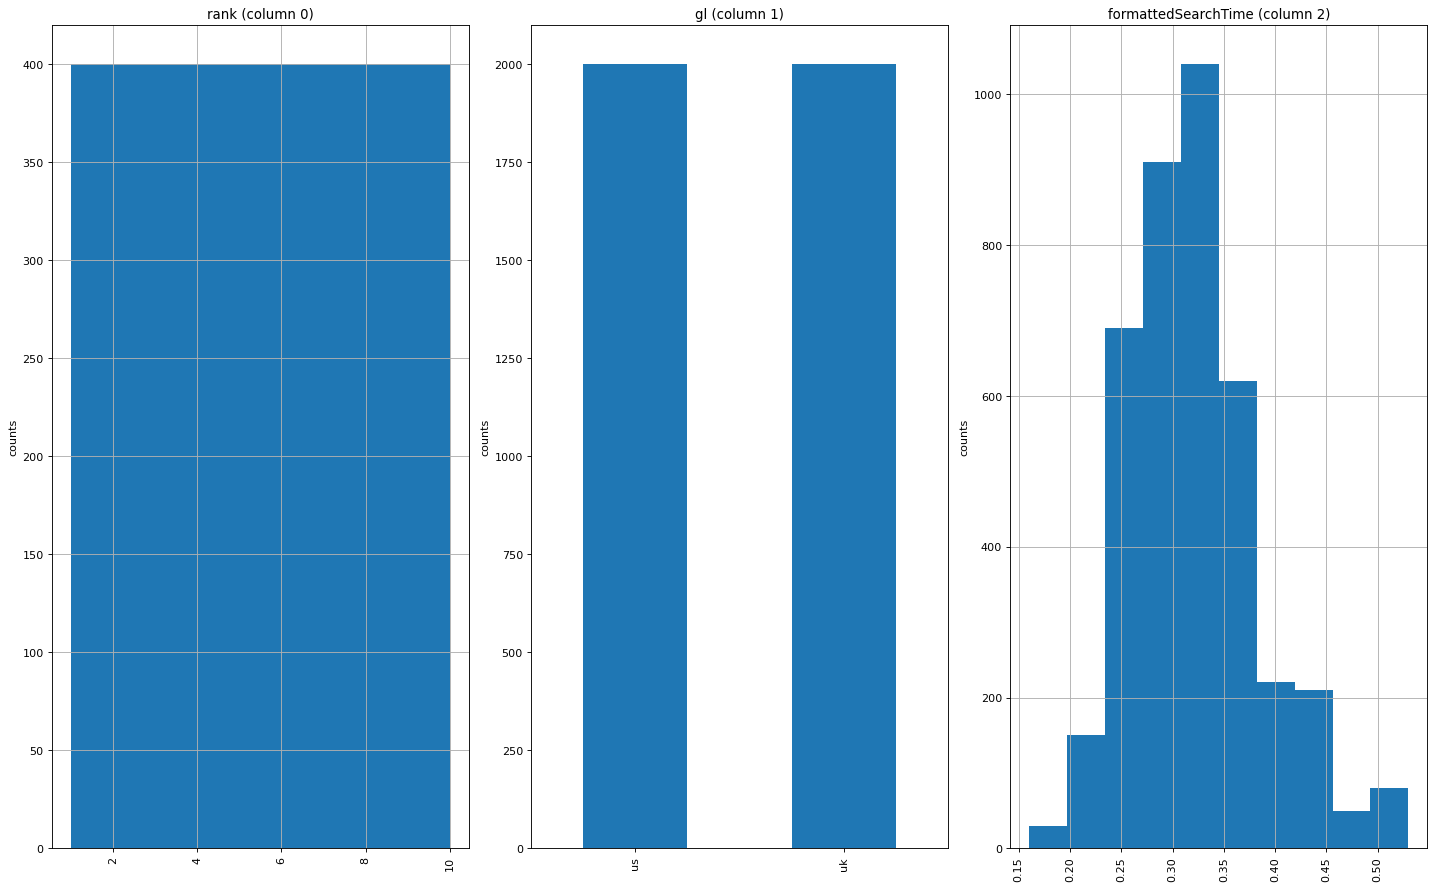

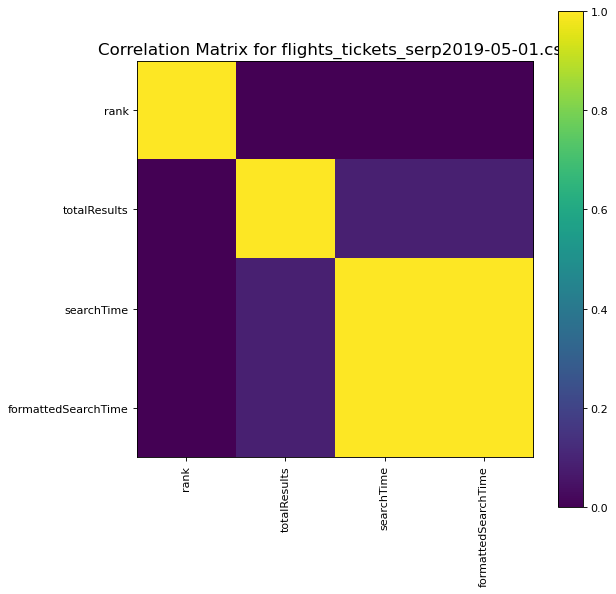

In [23]:
plotPerColumnDistribution(df1, 10, 5)
plotCorrelationMatrix(df1, 8)

### Scatter Matrix

In [24]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    

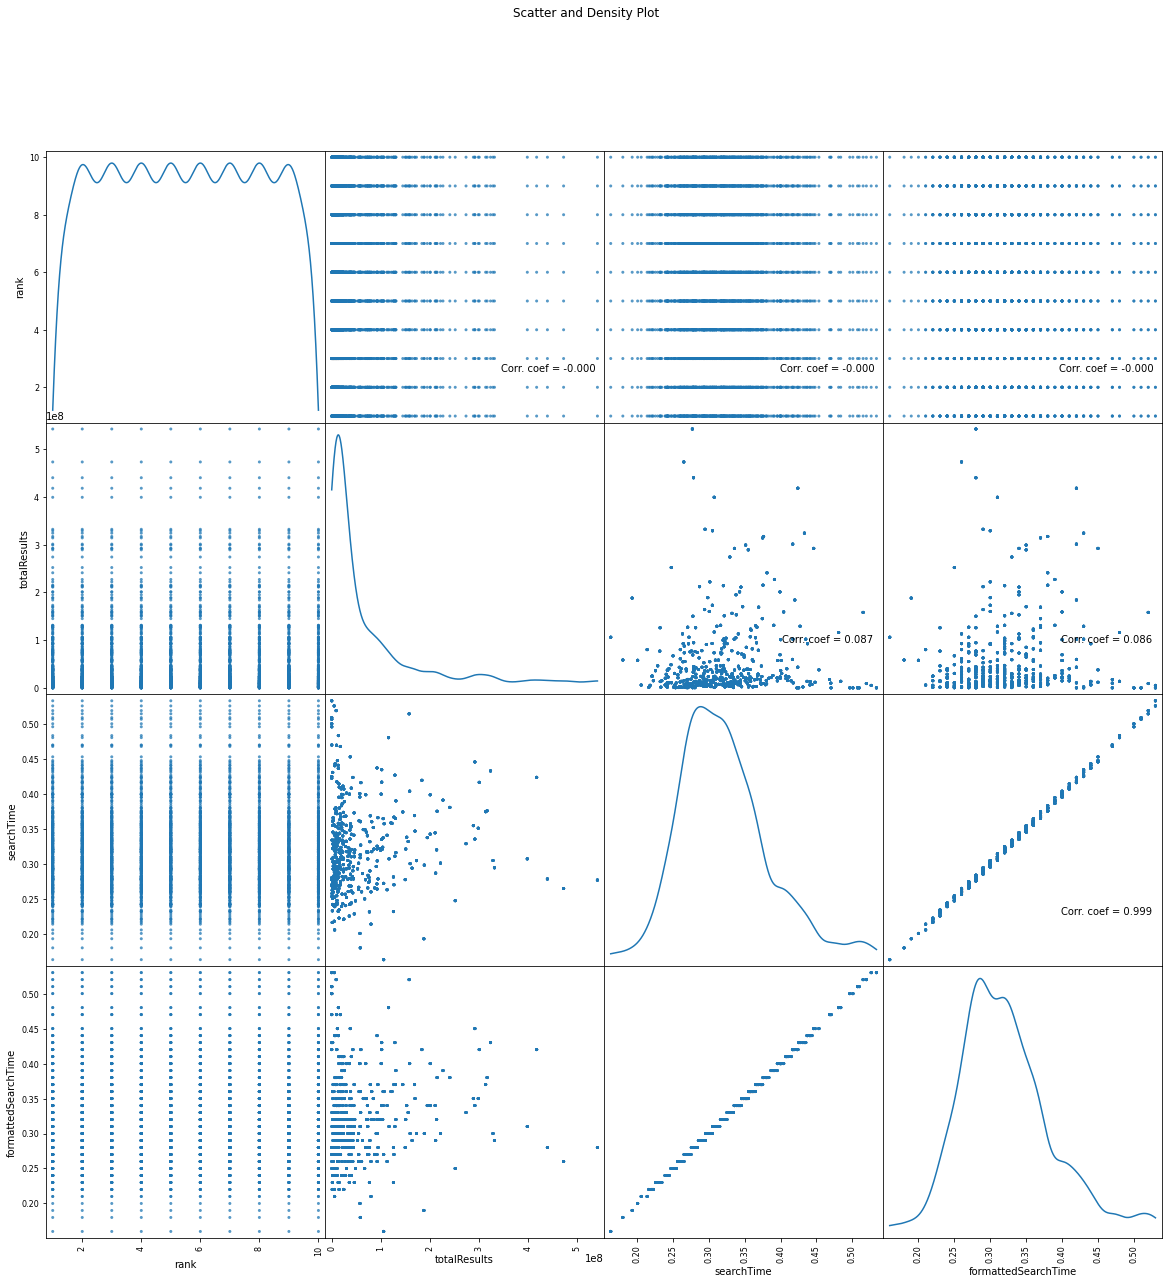

In [25]:
plotScatterMatrix(df1, 20,10)

### Which websites get more traffic in flight keywords?

In [26]:
# Estimation of percentage of traffic by google results position
traffic = {1: 0.33, 
           2: 0.18, 
           3: 0.12, 
           4: 0.08, 
           5: 0.06, 
           6: 0.05, 
           7: 0.04, 
           8: 0.03, 
           9: 0.02, 
           10: 0.02}

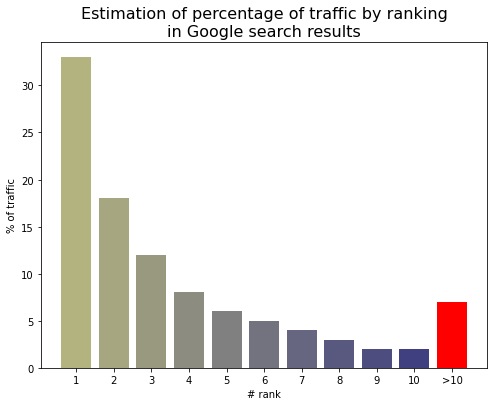

In [27]:
# Display the percentage of traffic with colors
colors = []
for i in range(10):
    xc = round(0.7-0.05*i,2)
    c = (xc,xc,0.5)
    colors.append(c)
colors = colors + ["red"]
    
x = [str(t) for t in range(1,11)] +[">10"]
y = [traffic[key]*100 for key in traffic.keys()]
y += [100-sum(y)]

plt.figure(figsize=(8,6))    
plt.bar(x,y, color = colors)
plt.title("Estimation of percentage of traffic by ranking\nin Google search results", fontsize = 16)
plt.xticks(x)
plt.xlabel("# rank")
plt.ylabel("% of traffic")
plt.show()


The first websites get most of the traffic. All the websites together, which don't rank on the first page, get only around 7-8% of the total traffic.

In [28]:
# Calculate the percentage of the total traffic by website
df["traffic%"] = df["rank"].map(traffic)
byTraffic = pd.pivot_table(df, values = "traffic%", index = "displayLink", aggfunc = "sum").sort_values("traffic%", ascending = False)
nb_terms = df["searchTerms"].nunique()

byTraffic["traffic%"] = byTraffic["traffic%"].apply(lambda x: (100/2) * (x/nb_terms))


Display the percentage of the total traffic by website.
Supposing that each term has an equal amount of traffic
what isn't true. It is the only way get an estimation,
because the dataset doesn't have the amount of traffic
by search term.


### Let us consider only top 20 sites for plotting

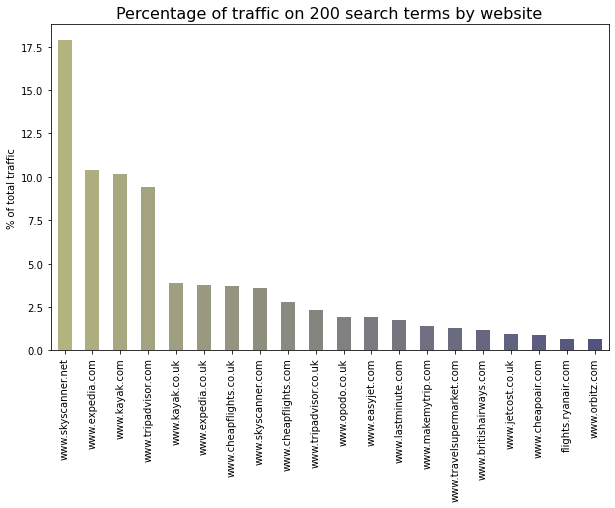

In [29]:
# number of top websites to plot
nb_website = 20

# Display the result with colors
colors = []
for i in range(nb_website):
    x = round(0.7-0.02*i,2)
    c = (x,x,0.5)
    colors.append(c)

plt.figure(figsize=(10,6))
plt.title(f"Percentage of traffic on {nb_terms} search terms by website", fontsize = 16)
byTraffic["traffic%"].iloc[:nb_website].plot.bar(color = colors)
plt.xlabel("")
plt.ylabel("% of total traffic")
plt.show()

In [30]:
# List with the top 4 websites in average ranking
top4 = byTraffic["traffic%"].iloc[:4].index

### Best keyword concentration to rank high<a class="anchor" id="4"></a>
As we have seen before a slightly better ranking for a search term makes a huge difference in the traffic for the website. To jump between the second and the first rank doubles the traffic, and this can also double the profit. Therefore, we will have a look at the optimal quantity of keywords in the title and in the snippet to get a better ranking.

In [31]:
# Calculate the % of keywords/search terms in the titles
df["%search_term_in_title"] = df["searchTerms"].apply(lambda x: len(x.split(" "))) / df["title"].apply(lambda x: len(x.split(" ")))
df["%search_term_in_title"] = 100 * df["%search_term_in_title"] # Convert the result in %


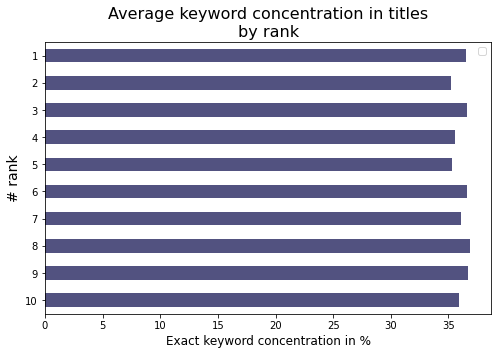

In [32]:
# Display the result
proc_searchterm_rank = pd.pivot_table(df, values = "%search_term_in_title", index = "rank", aggfunc = "mean").sort_index(ascending = False)
proc_searchterm_rank.plot.barh(figsize = (8,5), color = (0.32, 0.32, 0.5))
plt.legend("")
plt.xlabel("Exact keyword concentration in %", fontsize = 12)
plt.ylabel("# rank", fontsize = 14)
plt.title("Average keyword concentration in titles\nby rank", fontsize = 16)
plt.show()

In [33]:
# Calculate the % of keywords/search terms in the snippet
df["%search_term_in_snippet"] = df["searchTerms"].apply(lambda x: len(x.split(" "))) / df["snippet"].apply(lambda x: len(x.split(" ")))
df["%search_term_in_snippet"] = 100 * df["%search_term_in_snippet"] # Convert the result in %


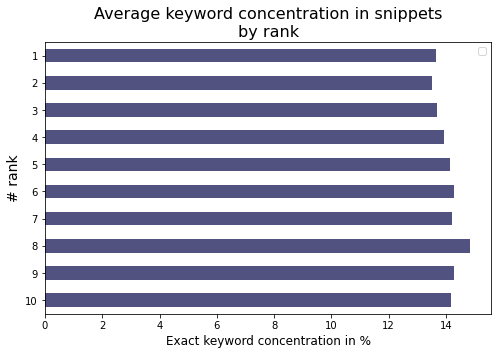

In [34]:
# Display the result
proc_snippet_rank = pd.pivot_table(df, values = "%search_term_in_snippet", index = "rank", aggfunc = "mean").sort_index(ascending = False)
proc_snippet_rank.plot.barh(figsize = (8,5), color = (0.32, 0.32, 0.5))
plt.legend("")
plt.xlabel("Exact keyword concentration in %", fontsize = 12)
plt.ylabel("# rank", fontsize = 14)
plt.title("Average keyword concentration in snippets\nby rank", fontsize = 16)
plt.show()

Surprisingly the concentration of search terms in the title and snippet and very similar for each ranking. 

There is a fierce competition for the search terms in the dataset, therefore we can expect only high optimized websites to rank well. 

Maybe is this concentration of search terms an optimized one? We would need a dataset with more ranks than only the 10 first ones to analyze it.

### Analysis of the changing average traffic<a class="anchor" id="5"></a>
In this moment there are 24 csv files with the ranks for the same keywords, but they all have different dates. We can use them to analyse the evolution in the ranking of some websites.

In [35]:
# Import and merge all the csv files
import os
lst_df_path = []
for dirname, _, filenames in os.walk('C:/Users/Aaron/Desktop/Flights'):
    for filename in filenames:
        lst_df_path.append(os.path.join(dirname, filename))
    

In [36]:
print(os.listdir('C:/Users/Aaron/Desktop/Flights'))

['flights_tickets_serp2018-12-16.csv', 'flights_tickets_serp2019-01-01.csv', 'flights_tickets_serp2019-01-15.csv', 'flights_tickets_serp2019-02-01.csv', 'flights_tickets_serp2019-02-15.csv', 'flights_tickets_serp2019-03-01.csv', 'flights_tickets_serp2019-03-15.csv', 'flights_tickets_serp2019-04-01.csv', 'flights_tickets_serp2019-04-15.csv', 'flights_tickets_serp2019-05-01.csv', 'flights_tickets_serp2019-05-15.csv', 'flights_tickets_serp2019-06-01.csv', 'flights_tickets_serp2019-06-15.csv', 'flights_tickets_serp2019-07-01.csv', 'flights_tickets_serp2019-07-15.csv', 'flights_tickets_serp2019-08-01.csv', 'flights_tickets_serp2019-08-15.csv', 'flights_tickets_serp2019-09-01.csv', 'flights_tickets_serp2019-09-15.csv', 'flights_tickets_serp2019-10-01.csv', 'flights_tickets_serp2020-02-15.csv', 'flights_tickets_serp2020-03-01.csv', 'flights_tickets_serp2020-03-15.csv', 'flights_tickets_serp2020-04-01.csv']


In [37]:
# Be aware that some months are missing
sorted([d[-14:-4] for d in lst_df_path ])

['2018-12-16',
 '2019-01-01',
 '2019-01-15',
 '2019-02-01',
 '2019-02-15',
 '2019-03-01',
 '2019-03-15',
 '2019-04-01',
 '2019-04-15',
 '2019-05-01',
 '2019-05-15',
 '2019-06-01',
 '2019-06-15',
 '2019-07-01',
 '2019-07-15',
 '2019-08-01',
 '2019-08-15',
 '2019-09-01',
 '2019-09-15',
 '2019-10-01',
 '2020-02-15',
 '2020-03-01',
 '2020-03-15',
 '2020-04-01']

In [38]:
# Charge all the datasets
lst_df = []
for d in range(len(lst_df_path)):
    lst_df.append(pd.read_csv(lst_df_path[d]))       

# Merge all the dataset
all_df = pd.concat(lst_df)

# Reset index
all_df = all_df.reset_index().drop("index",axis = 1)

In [39]:
# Convert to datetime: datetime will automatically take the first day of each month
# 2019-03 => 2019-03-01
all_df["queryTime"] = pd.to_datetime(all_df["queryTime"].apply(lambda x: x[:7]))

# Select the columns we will use
all_df = all_df[["searchTerms", "rank","displayLink","queryTime"]].copy()


In [40]:
# Calculate the percentage of the total traffic by website
all_df["traffic%"] = all_df["rank"].map(traffic)

avg_rank_bymonth = pd.pivot_table(all_df, 
                                  values = "traffic%", 
                                  index = "displayLink", 
                                  columns="queryTime", 
                                  aggfunc="sum")


In [41]:
# Select the top 4 websites
avg_rank_bymonth = avg_rank_bymonth.loc[top4]

# Adjust the values to be in percentage
avg_rank_bymonth = avg_rank_bymonth*(100/2)/nb_terms

For an unknown reason the values of some month are 
multiplicated by two.
Use an ad-hoc solution to fix it, dividing those
values by two (if you find the issue, write me please)

In [42]:
min_avg = avg_rank_bymonth.sum(axis=0).min()
sum_avg = avg_rank_bymonth.sum(axis=0)
idx_change = sum_avg[sum_avg >= 2*min_avg].index
avg_rank_bymonth[idx_change] /= 2

# Transpose the dataframe to be able to plot it well
avg_rank_bymonth = avg_rank_bymonth.transpose()

# Rename the columns: www.skyscanner.com => skyscanner
new_column_names = [c.split(".")[1] for c in avg_rank_bymonth.columns]
avg_rank_bymonth.columns = new_column_names

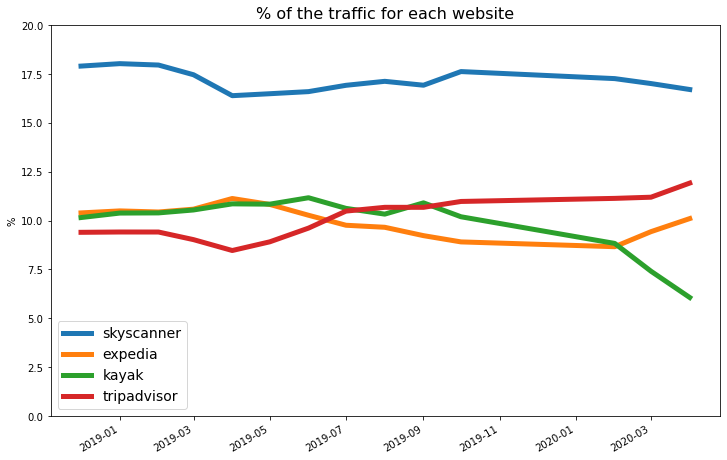

In [43]:
avg_rank_bymonth.plot(figsize = (12,8), lw = 5)
plt.title("% of the traffic for each website", fontsize = 16)
plt.ylabel("%")
plt.ylim(0, avg_rank_bymonth.max().max()+2)
plt.xlabel("")
plt.legend(fontsize = 14)
plt.show()

#### We can see that skyscanner has more traffic than the other websites

# 4. Comparison with flights and ticket keywords with Google Recipe <a class="anchor" id="4"></a>

The below code is pretty much the same as the one we ran for recipes.

In [44]:
flights_serp = pd.read_csv("C:/Users/Aaron/Desktop/Flights/flights_tickets_serp2018-12-16.csv")

flights_serp = flights_serp[flights_serp['gl'] == 'us']
flights_serp.iloc[:, :8].sample(5)

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults
201,flights to miami,2,"Cheap Flights to Miami, Florida (MIA Airport) ...",Expedia Add-On Advantage: Book a flight & unlo...,www.expedia.com,https://www.expedia.com/Cheap-Flights-To-Miami...,2018-12-16 11:26:31.912570+00:00,126000000
1059,tickets to dubai,10,Flights from Lagos (LOS) to Dubai (DXB) | Emir...,Book flights from Lagos (LOS) to Dubai (DXB) w...,www.emirates.com,https://www.emirates.com/ng/english/destinatio...,2018-12-16 11:26:36.003164+00:00,106000000
1918,tickets to rio de janeiro,9,"Cheap Rio de Janeiro Flights, 2019 RIO Airfare...","Looking for cheap flights to Rio de Janeiro, S...",www.travelocity.com,https://www.travelocity.com/Cheap-Flights-To-R...,2018-12-16 11:26:42.521241+00:00,13600000
991,flights to nice,2,"$528 Flights to Nice, France (NCE) - TripAdvisor",Cheap Flights to Nice: Enter your dates once a...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g187234-Ni...,2018-12-16 11:26:35.792086+00:00,252000000
195,flights to prague,6,easyJet.com | Cheap winter flights to Prague f...,"from London Southend, one way in January. Over...",www.easyjet.com,http://www.easyjet.com/en/cheap-flights/czech-...,2018-12-16 11:26:31.859836+00:00,24700000


In [45]:
summary_flights = (flights_serp
                   .groupby(['displayLink'], as_index=False)
                   .agg({'rank': ['count', 'mean']})
                   .sort_values(('rank', 'count'), ascending=False)
                   .assign(coverage=lambda df: df[('rank', 'count')].div(flights_serp['searchTerms'].nunique())))

summary_flights.columns = ['displayLink', 'count', 'avg_rank', 'coverage']
summary_flights['displayLink'] = summary_flights['displayLink'].str.replace('www.', '')
summary_flights['avg_rank'] = summary_flights['avg_rank'].round(1)
summary_flights['coverage'] = summary_flights['coverage'].mul(100).round(1).astype(str).add('%')
summary_flights.head(10).reset_index(drop=True)

<ipython-input-45-ed033480b283>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



,displayLink,count,avg_rank,coverage
0,tripadvisor.com,201,3.1,100.5%
1,expedia.com,197,2.6,98.5%
2,kayak.com,179,2.2,89.5%
3,skyscanner.com,160,4.4,80.0%
4,cheapflights.com,147,5.8,73.5%
5,skyscanner.net,143,6.1,71.5%
6,cheapoair.com,71,6.7,35.5%
7,orbitz.com,55,7.0,27.5%
8,makemytrip.com,46,5.8,23.0%
9,lufthansa.com,38,7.1,19.0%


This looks quite different from how recipes domains are distributed on search. YouTbe has coverage of 154%, and the first competitor is at 41%. Here, there is fierce competition among the top four, all of which are almost 80% and above. 

In [46]:
top_domains_flights = flights_serp['displayLink'].value_counts()[:10].index.tolist()
top_df_flights = flights_serp[flights_serp['displayLink'].isin(top_domains_flights)]

rank_counts_flights = top_df_flights.groupby(['displayLink', 'rank']).agg({'rank': ['count']}).reset_index()
rank_counts_flights.columns = ['displayLink', 'rank', 'count']
rank_counts_flights.head()

,displayLink,rank,count
0,www.cheapflights.com,1,2
1,www.cheapflights.com,2,4
2,www.cheapflights.com,3,3
3,www.cheapflights.com,4,24
4,www.cheapflights.com,5,38


In [47]:
fig = go.FigureWidget()

fig.add_scatter(x=top_df_flights['displayLink'].str.replace('www.', ''),
                y=top_df_flights['rank'], mode='markers',
                marker={'size': 35, 'opacity': 0.035,})


fig.add_scatter(x=rank_counts_flights['displayLink'].str.replace('www.', ''),
                y=rank_counts_flights['rank'], mode='text', text=rank_counts_flights['count'])

fig.layout.hovermode = False
fig.layout.yaxis.autorange = 'reversed'
fig.layout.yaxis.zeroline = False
fig.layout.yaxis.tickvals = list(range(1, 11))
fig.layout.height = 600
fig.layout.title = 'Top Domains for Flights and Tickets Keywords - Google - USA'
fig.layout.yaxis.title = 'SERP Rank (number of appearances)'
fig.layout.showlegend = False
fig.layout.paper_bgcolor = '#eeeeee'
fig.layout.plot_bgcolor = '#eeeeee'
iplot(fig)

<ipython-input-47-196dea2817ee>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-47-196dea2817ee>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



# 5. Recipe Keywords on YouTube <a class="anchor" id="5"></a>

In [48]:
recipes_ytb = pd.read_csv('C:/Users/Aaron/Desktop/RECIPEES/recipes_serp_youtube_data.csv')
print('shape:', recipes_ytb.shape)
recipes_ytb.sample(5)

shape: (1455, 90)


,q,queryTime,rank,title,description,publishedAt,channelTitle,totalResults,kind,channelId,default.height,default.url,default.width,high.height,high.url,high.width,liveBroadcastContent,medium.height,medium.url,medium.width,nextPageToken,playlistId,resultsPerPage,thumbnails,videoId,video.contentDetails,video.etag,video.id,video.kind,video.localizations,video.player,video.recordingDetails,video.snippet,video.statistics,video.status,video.topicDetails,video.categoryId,video.channelId,video.channelTitle,video.defaultAudioLanguage,video.defaultLanguage,video.description,video.liveBroadcastContent,video.localized,video.publishedAt,video.tags,video.thumbnails,video.title,video.relevantTopicIds,video.topicCategories,video.topicIds,video.commentCount,video.dislikeCount,video.favoriteCount,video.likeCount,video.viewCount,video.embeddable,video.license,video.privacyStatus,video.publicStatsViewable,video.uploadStatus,video.caption,video.definition,video.dimension,video.duration,video.licensedContent,video.projection,video.regionRestriction,video.liveStreamingDetails,video.contentRating,channel.contentDetails,channel.etag,channel.id,channel.kind,channel.snippet,channel.statistics,channel.country,channel.customUrl,channel.defaultLanguage,channel.description,channel.localized,channel.publishedAt,channel.thumbnails,channel.title,channel.commentCount,channel.hiddenSubscriberCount,channel.subscriberCount,channel.videoCount,channel.viewCount,channel.relatedPlaylists
136,Ambuyat recipe,2019-03-30 02:55:42.169989+00:00,2,Cara buat ambuyat paling mudah dan sedap (shar...,NaN,2018-01-09T03:47:35.000Z,Sitinurr Islamiah,1088,youtube#video,UCZTtpcZsLWv3zcWwbaTrz2w,90.0,https://i.ytimg.com/vi/uK7ph0wR6C0/default.jpg,120.0,360.0,https://i.ytimg.com/vi/uK7ph0wR6C0/hqdefault.jpg,480.0,none,180.0,https://i.ytimg.com/vi/uK7ph0wR6C0/mqdefault.jpg,320.0,CAUQAA,NaN,5,{'default': {'url': 'https://i.ytimg.com/vi/uK...,uK7ph0wR6C0,"{'duration': 'PT2M51S', 'dimension': '2d', 'de...","""XpPGQXPnxQJhLgs6enD_n8JR4Qk/Qw2HPOOzY5Jb2oPRN...",uK7ph0wR6C0,youtube#video,NaN,"{'embedHtml': '<iframe width=""480"" height=""360...",NaN,"{'publishedAt': '2018-01-09T03:47:35.000Z', 'c...","{'viewCount': '22225', 'likeCount': '167', 'di...","{'uploadStatus': 'processed', 'privacyStatus':...","{'topicIds': ['/m/019_rr', '/m/02wbm'], 'relev...",22.0,UCZTtpcZsLWv3zcWwbaTrz2w,Sitinurr Islamiah,NaN,NaN,NaN,none,{'title': 'Cara buat ambuyat paling mudah dan ...,2018-01-09T03:47:35.000Z,NaN,{'default': {'url': 'https://i.ytimg.com/vi/uK...,Cara buat ambuyat paling mudah dan sedap (shar...,"['/m/019_rr', '/m/02wbm']","['https://en.wikipedia.org/wiki/Food', 'https:...","['/m/019_rr', '/m/02wbm']",28.0,15.0,0.0,167.0,22225.0,True,youtube,public,True,processed,False,sd,2d,PT2M51S,False,rectangular,NaN,NaN,NaN,{'relatedPlaylists': {'uploads': 'UUZTtpcZsLWv...,"""XpPGQXPnxQJhLgs6enD_n8JR4Qk/RrZrrFRls48UuBlFZ...",UCZTtpcZsLWv3zcWwbaTrz2w,youtube#channel,"{'title': 'Sitinurr Islamiah', 'description': ...","{'viewCount': '22254', 'commentCount': '0', 's...",NaN,NaN,NaN,NaN,"{'title': 'Sitinurr Islamiah', 'description': ''}",2017-07-15T07:21:04.000Z,{'default': {'url': 'https://yt3.ggpht.com/a-/...,Sitinurr Islamiah,0,False,45,2,22254,"{'uploads': 'UUZTtpcZsLWv3zcWwbaTrz2w', 'watch..."
1043,doi recipe,2019-03-30 02:55:42.169989+00:00,5,দই বানানোর সবচেয়ে সহজ পদ্ধতি | টক দই | মিষ্টি ...,দই এর বীজ এবং সেই বীজ থেকে টক দই ...,2017-07-22T14:15:40.000Z,Rabiya's House,604171,youtube#video,UChB0PKYrP2Hpyf0NrrPno7w,90.0,https://i.ytimg.com/vi/7wEORn4jWhE/default.jpg,120.0,360.0,https://i.ytimg.com/vi/7wEORn4jWhE/hqdefault.jpg,480.0,none,180.0,https://i.ytimg.com/vi/7wEORn4jWhE/mqdefault.jpg,320.0,CAUQAA,NaN,5,{'default': {'url': 'https://i.ytimg.com/vi/7w...,7wEORn4jWhE,"{'duration': 'PT8M42S', 'dimension': '2d', 'de...","""XpPGQXPnxQJhLgs6enD_n8JR4Qk/7kkA_gL_dhvFvlaq8...",7wEORn4jWhE,youtube#video,NaN,"{'embedHtml': '<iframe width=""480"" height=""270...",NaN,"{'publishedAt': '2017-07-22T14:15:40.000Z', 'c...

#### Here there are 90 columns. There are several numeric columns that we can use to analyze YouTube data. 


In [49]:
count_columns = [col for col in recipes_ytb.columns if 'Count' in col if col not in ['video.favoriteCount', 'channel.commentCount']]
count_columns

['video.commentCount',
 'video.dislikeCount',
 'video.likeCount',
 'video.viewCount',
 'channel.hiddenSubscriberCount',
 'channel.subscriberCount',
 'channel.videoCount',
 'channel.viewCount']

#### Checking if there is any correlation between any of those numeric columns and the rank of the channel. Apparently there seems to be none!

In [50]:
for col in count_columns:
    corr_df = recipes_ytb[['rank', col]].corr()
    print(f"{col:>30} {corr_df['rank'][-1]:%}")

            video.commentCount 2.144761%
            video.dislikeCount 2.621898%
               video.likeCount 1.702494%
               video.viewCount 2.431352%
 channel.hiddenSubscriberCount 0.767410%
       channel.subscriberCount -0.371269%
            channel.videoCount -0.734688%
             channel.viewCount 3.802681%


In [51]:
summary_ytb = (recipes_ytb
              .groupby(['channelTitle'], as_index=False)
              .agg({'rank': ['count', 'mean']})
              .sort_values(('rank', 'count'), ascending=False)
              .assign(coverage=lambda df: df[('rank', 'count')].div(recipes_ytb['q'].nunique())))
summary_ytb.columns = ['channelTitle', 'count', 'avg_rank', 'coverage']
# summary_ytb['displayLink'] = summary_ytb['displayLink'].str.replace('www.', '')
summary_ytb['avg_rank'] = summary_ytb['avg_rank'].round(1)
summary_ytb['coverage'] = summary_ytb['coverage'].mul(100).round(1).astype(str).add('%')
summary_ytb.head(10).reset_index(drop=True)

,channelTitle,count,avg_rank,coverage
0,Food Wishes,19,2.3,4.6%
1,Tasty,19,2.3,4.6%
2,Jamie Oliver,16,2.3,3.9%
3,Panlasang Pinoy,11,3.6,2.7%
4,Dishes around the world,10,2.8,2.4%
5,caribbeanpot,8,3.0,2.0%
6,Quang Tran,8,4.1,2.0%
7,AllasYummyFood,8,2.4,2.0%
8,Laura in the Kitchen,8,3.2,2.0%
9,Kabita's Kitchen,7,2.6,1.7%


##### Here the picture is completely different from Google search (for both, recipes and flights). The top channel has a coverage score of 4.6%.  


In [52]:
top_channels = recipes_ytb['channelTitle'].value_counts()[:10].index.tolist()
top_channels_df = recipes_ytb[recipes_ytb['channelTitle'].isin(top_channels)]

rank_counts_ytb = top_channels_df.groupby(['channelTitle', 'rank']).agg({'rank': ['count']}).reset_index()
rank_counts_ytb.columns = ['channelTitle', 'rank', 'count']
rank_counts_ytb.head()

,channelTitle,rank,count
0,AllasYummyFood,1,3
1,AllasYummyFood,2,1
2,AllasYummyFood,3,2
3,AllasYummyFood,4,2
4,Dishes around the world,1,2


In [53]:
fig = go.FigureWidget()

fig.add_scatter(x=top_channels_df['channelTitle'],
                y=top_channels_df['rank'], mode='markers',
                marker={'size': 35, 'opacity': 0.25,})


fig.add_scatter(x=rank_counts_ytb['channelTitle'].str.replace('www.', ''),
                y=rank_counts_ytb['rank'], mode='text', text=rank_counts_ytb['count'])

fig.layout.hovermode = False
fig.layout.yaxis.autorange = 'reversed'
fig.layout.yaxis.zeroline = False
fig.layout.yaxis.tickvals = list(range(1, 11))
fig.layout.height = 600
fig.layout.title = 'Recipes Keywords Rankings - YouTube'
fig.layout.yaxis.title = 'SERP Rank (number of appearances)'
fig.layout.showlegend = False
fig.layout.paper_bgcolor = '#eeeeee'
fig.layout.plot_bgcolor = '#eeeeee'
iplot(fig)

<ipython-input-53-d33e30e77552>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



## Text Analysis

Since we have a lot of numeric columns that describe videos and channels, and since we also have many text columns, let's do some word counting and see which are the most common.  
Note that there are two types of counting that are provided by the `word_frequency` function. 

Absolute (`abs_freq`): This is a simple count of how many times each word was used in the text list that we specify. 
Weighted (`wtd_freq`): This takes into consideration the numeric value that we provide.

In [54]:
serp_word_freq = adv.word_frequency(recipes['title'], 
                                    rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_word_freq.head(10)

,word,abs_freq
0,recipe,2115
1,food,524
2,youtube,463
3,recipes,375
4,chicken,354
5,rice,270
6,stew,253
7,beef,193
8,traditional,180
9,dish,179


###### The above table shows the most used words in the title column of the `recipes` DataFrame, for Google. "recipe", "food", "youtube", and "recipes" (the top words) are not surprising. 


##### Below is the same count for the snippet column. Again chicken, together with rice, are the only specific foods mentioned. The rest are generic words about recipes and food. 

In [55]:
serp_word_freq_snippet = adv.word_frequency(recipes['snippet'].fillna(''), rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_word_freq_snippet.head(10)

,word,abs_freq
0,recipe,2201
1,dish,1070
2,easy,566
3,recipes,564
4,2018,517
5,chicken,464
6,2017,463
7,food,450
8,rice,441
9,traditional,436


##### Things get more interesting with weighted frequency.  Here is the word frequency for YouTube's DataFrame, counting words in the title column, with videos' number of views.

In [56]:
serp_ytb_word_freq_title = adv.word_frequency(text_list=recipes_ytb['title'].fillna(''), 
                                              num_list=recipes_ytb['video.viewCount'],
                                              rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_ytb_word_freq_title.head(10).style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'})

,word,abs_freq,wtd_freq,rel_value
0,recipe,412,"394,834,312","958,336"
1,video,22,"303,626,689","13,801,213"
2,official,1,"297,946,551","297,946,551"
3,dem,1,"297,946,551","297,946,551"
4,khalifa,1,"297,946,551","297,946,551"
5,wiz,1,"297,946,551","297,946,551"
6,boyz,1,"297,946,551","297,946,551"
7,chicken,94,"183,113,126","1,948,012"
8,fried,33,"120,028,074","3,637,214"
9,easy,67,"111,481,010","1,663,896"


"recipe" was used 412 times, and the sum total of views for all videos who's title contains "recipes" was 394,834,312.  
The words on indexes two to six are interesting. They all have an `abs_freq` of one, and the same number on `wtd_freq`. 

This means that there was one video who's title contained these words, and this is further confirmed by the fact that they all have the same `wtd_freq`.  
  
Again "chicken" is the top specific food word in this DataFrame. 



#### Let's run the same function for the description column (also weighted by the number of views):

In [57]:
serp_ytb_word_freq_desc = adv.word_frequency(recipes_ytb['description'].fillna(''), recipes_ytb['video.viewCount'],
                                              rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_ytb_word_freq_desc.head(20).style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'})

,word,abs_freq,wtd_freq,rel_value
0,recipe,457,"330,827,120","723,911"
1,add,10,"301,085,475","30,108,548"
2,dem,2,"298,715,987","149,357,994"
3,city,4,"298,155,473","74,538,868"
4,playlists,1,"297,946,551","297,946,551"
5,boyz,1,"297,946,551","297,946,551"
6,blacchollywood,1,"297,946,551","297,946,551"
7,wiz,1,"297,946,551","297,946,551"
8,http://smarturl.it/blacchollywood,1,"297,946,551","297,946,551"
9,http://wizkhalifa.com/tour,1,"297,946,551","297,946,551"


#### Video tags

In [58]:
serp_ytb_word_freq_tags = adv.word_frequency(recipes_ytb['video.tags'].fillna(''), recipes_ytb['video.viewCount'],
                                              rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_ytb_word_freq_tags.head(20).style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'})

,word,abs_freq,wtd_freq,rel_value
0,recipe,1819,"2,314,742,979","1,272,536"
1,musical,9,"1,197,135,609","133,015,068"
2,food,1556,"927,719,680","596,221"
3,chicken,421,"796,587,073","1,892,131"
4,recipes,786,"726,547,575","924,361"
5,rice,365,"616,143,440","1,688,064"
6,cooking,818,"612,290,334","748,521"
7,music,15,"605,235,005","40,349,000"
8,city/town/village,14,"598,345,035","42,738,931"
9,album,3,"597,286,882","199,095,627"


#### Video Topics

In [59]:
serp_ytb_word_freq_topics = adv.word_frequency(recipes_ytb['video.topicCategories'].fillna(''), recipes_ytb['video.viewCount'],
                                              rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
serp_ytb_word_freq_topics.head(20).style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'})

,word,abs_freq,wtd_freq,rel_value
0,https://en.wikipedia.org/wiki/lifestyle_(sociology,1390,"928,489,728","667,978"
1,https://en.wikipedia.org/wiki/food,1362,"890,762,847","654,011"
2,https://en.wikipedia.org/wiki/music,9,"298,459,910","33,162,212"
3,https://en.wikipedia.org/wiki/hip_hop_music,1,"297,946,551","297,946,551"
4,https://en.wikipedia.org/wiki/hobby,11,"34,464,842","3,133,167"
5,https://en.wikipedia.org/wiki/television_program,18,"13,841,205","768,956"
6,https://en.wikipedia.org/wiki/entertainment,17,"9,943,737","584,926"
7,https://en.wikipedia.org/wiki/pet,29,"5,476,422","188,842"
8,https://en.wikipedia.org/wiki/humour,2,"4,001,671","2,000,836"
9,https://en.wikipedia.org/wiki/video_game_culture,7,"2,880,327","411,475"


#### Now we want to know which/if hashtags are popular in video descriptions. So let us use `adv.regex.HASHTAG_RAW` to extract the hashtags. 

In [60]:
(adv.word_frequency(recipes_ytb['video.description'].fillna(''), 
                    recipes_ytb['video.viewCount'],
                    regex=adv.regex.HASHTAG_RAW,
                    rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
 .head(15)
 .style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'}))

,word,abs_freq,wtd_freq,rel_value
0,#blacchollywood,1,"297,946,551","297,946,551"
1,#foodtube,14,"24,647,543","1,760,539"
2,#mykitchenmydish,2,"10,563,420","5,281,710"
3,#omarallibhoy,4,"9,467,016","2,366,754"
4,#gordonramsay,1,"7,931,958","7,931,958"
5,#thefword,1,"7,931,958","7,931,958"
6,#annarecetasfaciles,2,"5,144,972","2,572,486"
7,#tapasrevolution,1,"4,897,619","4,897,619"
8,#tapas,3,"4,569,397","1,523,132"
9,#misti_doi,1,"4,506,119","4,506,119"


### @mentions

In [61]:
(adv.word_frequency(recipes_ytb['video.description'].fillna(''), 
                    recipes_ytb['video.viewCount'],
                    regex=adv.regex.MENTION_RAW,
                    rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
 .head(15)
 .style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'}))

,word,abs_freq,wtd_freq,rel_value
0,@claire__rosen,1,"8,840,807","8,840,807"
1,@buzzfeedworthit,1,"8,840,807","8,840,807"
2,@lauraskitchen,8,"6,652,253","831,532"
3,@annarecetasfaciles,2,"5,144,972","2,572,486"
4,@gordonramsay01,1,"3,184,419","3,184,419"
5,@rookiewithacookie,1,"2,301,555","2,301,555"
6,@allrecipesvideo,1,"2,076,465","2,076,465"
7,@cuisine228_,6,"1,157,572","192,929"
8,@cuisine228,1,"993,810","993,810"
9,@lynnjaphet,1,"951,610","951,610"


### Currency Symbols

In [62]:
(adv.word_frequency(recipes_ytb['video.description'].fillna(''), 
                    recipes_ytb['video.viewCount'],
                    regex=adv.regex.CURRENCY_RAW,
                    rm_words=list(adv.stopwords['english']) + ['-', '', '|', '–', '&'])
 .head(15)
 .style.format({'wtd_freq': '{:,.0f}', 'rel_value': '{:,.0f}'}))

,word,abs_freq,wtd_freq,rel_value
0,$,13,"7,953,773","611,829"
1,€,1,"9,583","9,583"
2,£,1,632,632


This was a quick overview of doing some SEO research on Google, YouTube and flight keywords, and how we can compare, and extract certain information.  
As I was going throught this i feel like we can do some more research for further analysis.
